# 绘制大图

### 方法一

可以仅修改“list(df.columns[1:3]) + list(df.columns[4:5])”来绘制所需的模型的曲线

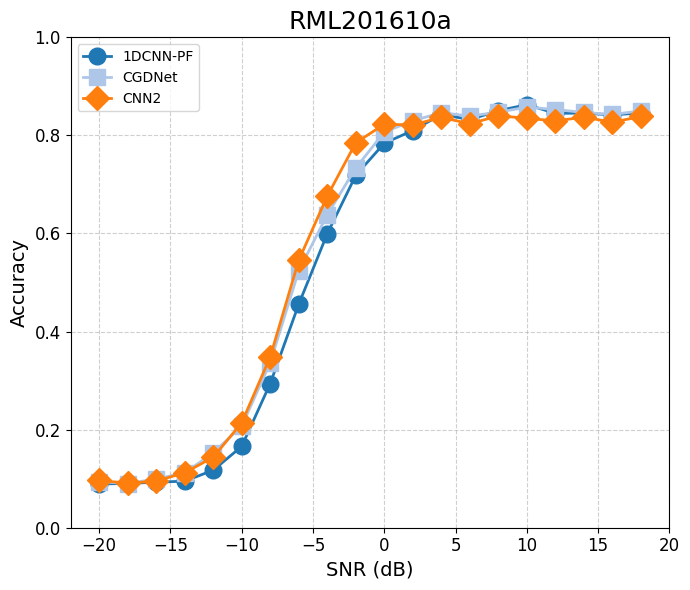

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
df = pd.read_excel('RML201610a.xlsx')

# 设置图像大小
plt.figure(figsize=(7, 6))

# 颜色和标记样式列表（可扩展）
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'x', 'd', '+', '1']
colors = plt.cm.tab20.colors  # 获取tab20色盘中的颜色

#df.columns[1:]就是全部
selected_columns = list(df.columns[1:3]) + list(df.columns[6:7])# 这里这里这里这里，修改这里可以选择模型

# 绘制每条线
for idx, column in enumerate(selected_columns):  
    plt.plot(
        df['SNR'],
        df[column],
        label=column,
        marker=markers[idx % len(markers)],
        color=colors[idx % len(colors)],  # 使用循环索引选择颜色
        linewidth=2,
        markersize=12
    )

# 设置横轴最大值为 20
plt.xlim(-22, 20)
plt.ylim(0, 1)

# 设置较小的网格间隔
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# 调整坐标轴刻度的间隔
plt.xticks(range(-20, 21, 5), fontsize=12)  # X轴每隔2个单位显示一个刻度
plt.yticks(fontsize=12)  # Y轴刻度字体大小

# 添加标签和标题
plt.title('RML201610a', fontsize=18)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# 图例和布局调整
plt.legend(fontsize=10, loc='upper left', ncol=1)
plt.tight_layout()

# 显示图像
plt.show()


### 方法二

修改变量**columns_to_plot**指定模型曲线

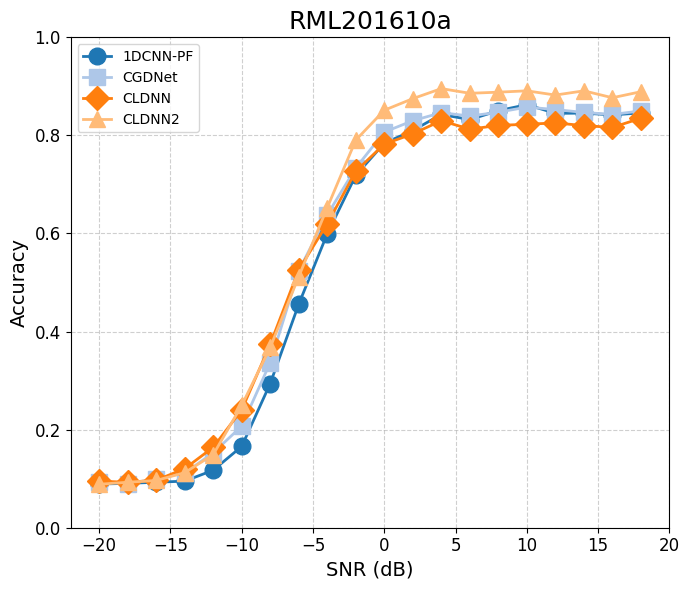

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
df = pd.read_excel('RML201610a.xlsx')

# 你可以在这里指定想画的列（列名必须和Excel文件中一致）
# '1DCNN-PF', 'CGDNet', 'CLDNN', 'CLDNN2', 'CNN1', 'CNN2', 'DAE'
# 'DenseNet', 'GRU2', 'IC-AMCNet', 'LSTM2', 'MCLDNN', 'MCNET', 'PET-CGDNN', 'ResNet'
columns_to_plot = ['1DCNN-PF','CGDNet','CLDNN','CLDNN2']  # 举例，可根据你的文件更改

# 设置图像大小
plt.figure(figsize=(7, 6))

# 样式列表
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'x', 'd', '+', '1']
colors = plt.cm.tab20.colors

# 绘图
for idx, column in enumerate(columns_to_plot):
    if column not in df.columns:
        print(f"警告：列名 '{column}' 不在 Excel 文件中，已跳过。")
        continue
    plt.plot(
        df['SNR'],
        df[column],
        label=column,
        marker=markers[idx % len(markers)],
        color=colors[idx % len(colors)],
        linewidth=2,
        markersize=12
    )

# 轴、网格、标签设置
plt.xlim(-22, 20)
plt.ylim(0, 1)
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.xticks(range(-20, 21, 5), fontsize=12)
plt.yticks(fontsize=12)
plt.title('RML201610a', fontsize=18)
plt.xlabel('SNR (dB)', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=10, loc='upper left', ncol=1)
plt.tight_layout()

plt.show()


# 绘制小图

注意本代码需要读取xlsx文件只有SNR为0~18的数值

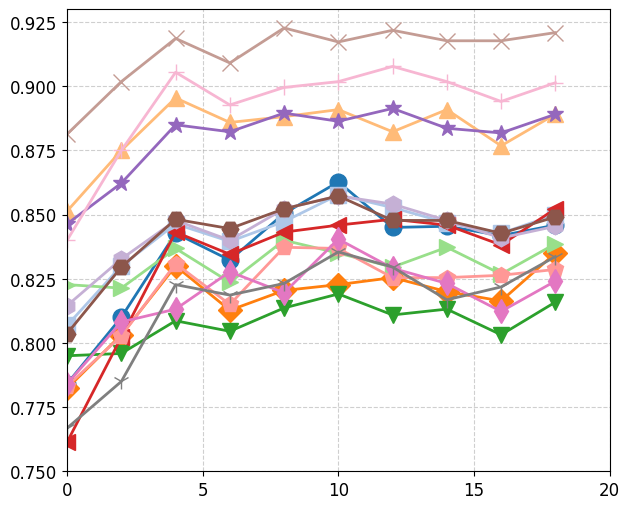

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# 读取 Excel 文件
df = pd.read_excel('RML201610a.xlsx')

# 设置图像大小
plt.figure(figsize=(7, 6))

# 颜色和标记样式列表（可扩展）
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', 'x', 'd', '+', '1']
colors = plt.cm.tab20.colors  # 获取tab20色盘中的颜色

# 绘制每条线
for idx, column in enumerate(df.columns[1:]):  # 第一个是 SNR
    plt.plot(
        df['SNR'],
        df[column],
        label=column,
        marker=markers[idx % len(markers)],
        color=colors[idx % len(colors)],  # 使用循环索引选择颜色
        linewidth=2,
        markersize=12
    )

# 设置横轴最大值为 20
plt.xlim(0, 20)
plt.ylim((math.floor(df.iloc[:, 1:].min().min() * 100) / 100) - 0.01, (math.floor(df.iloc[:, 1:].max().max() * 100) / 100) + 0.01)

# 设置较小的网格间隔
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# 调整坐标轴刻度的间隔
plt.xticks(range(0, 21, 5), fontsize=12)  # X轴每隔2个单位显示一个刻度
plt.yticks(fontsize=12)  # Y轴刻度字体大小

# 添加标签和标题
# plt.title('RML201610a', fontsize=18)
# plt.xlabel('SNR (dB)', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)

# 显示图像
plt.show()
